In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
df = pd.read_csv("data_stocks.csv")

In [6]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
df['DATE'].dtypes

dtype('int64')

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')

In [9]:
df.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [11]:
df.index = df['DATE']
df

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.370,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500
2017-04-03 13:31:00,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.370,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500
2017-04-03 13:32:00,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.585,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650
2017-04-03 13:33:00,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.460,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800
2017-04-03 13:34:00,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.470,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 19:56:00,2017-08-31 19:56:00,2472.2200,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,...,99.675,99.530,49.485,40.955,76.360,32.285,62.110,76.88,114.310,62.7250
2017-08-31 19:57:00,2017-08-31 19:57:00,2471.7700,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,...,99.730,99.630,49.480,40.960,76.370,32.295,62.100,76.90,114.330,62.7100
2017-08-31 19:58:00,2017-08-31 19:58:00,2470.0300,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,...,99.735,99.640,49.495,40.940,76.315,32.290,62.090,76.88,114.310,62.6850


In [12]:
df.drop('DATE',axis = 1,inplace=True)

In [13]:
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

Method is similar. Hence, NASDAQ.AAPL done as reference

In [14]:
df_AAPL = df[['NASDAQ.AAPL']].copy()

In [15]:
df_AAPL.head()

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,143.6800
2017-04-03 13:31:00,143.7000
2017-04-03 13:32:00,143.6901
2017-04-03 13:33:00,143.6400
2017-04-03 13:34:00,143.6600


In [16]:
df_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

<AxesSubplot:xlabel='DATE'>

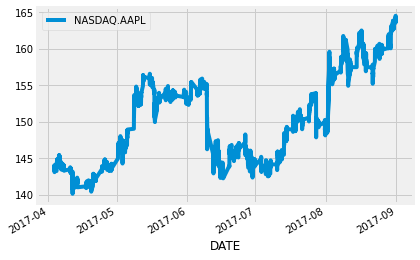

In [17]:
df_AAPL.plot()

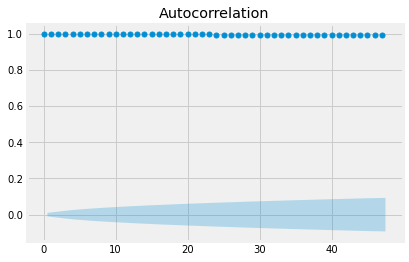

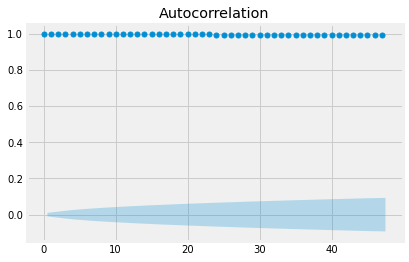

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_AAPL,use_vlines=False)

Converting series to Stationary

In [20]:
df_AAPL.shift(1)

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,143.6800
2017-04-03 13:32:00,143.7000
2017-04-03 13:33:00,143.6901
2017-04-03 13:34:00,143.6400
...,...
2017-08-31 19:56:00,164.1400
2017-08-31 19:57:00,164.1100
2017-08-31 19:58:00,164.1200


In [21]:
X = df_AAPL.values
train = X[0:28886] # 70% data as train data
test = X[28886:] # 30% data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


Making ARIMA MODEL

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [24]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 170326.9720446082
(0, 0, 1) 131018.0359986555
(0, 0, 2) 95780.67244459353
(0, 0, 3) 67525.18962516481
(0, 0, 4) 45787.34709203339
(0, 1, 0) -64708.71200636141
(0, 1, 1) -64706.87731534078
(0, 1, 2) -64718.28609667219
(0, 1, 3) -64719.67999909296
(0, 1, 4) -64724.746502434704
(0, 1, 5) -64723.27395757097
(0, 2, 0) -44617.132207470146
(0, 2, 1) -64678.28846730794
(0, 2, 2) -64676.48009018421
(0, 2, 3) -64688.1272660774
(0, 2, 4) -64689.28765364924
(0, 2, 5) -64694.651766424344
(1, 0, 0) -64703.106012246135
(1, 0, 1) -64701.25996888909
(1, 0, 2) -64712.567383996386
(1, 0, 3) -64714.013817863946
(1, 0, 4) -64719.00741063582
(1, 0, 5) -64717.516472697054
(1, 1, 0) -64706.870295588844
(1, 1, 1) -64709.61143479207
(1, 1, 2) -64725.38695948165
(1, 1, 3) -64723.394925330984
(1, 1, 4) -64724.05657392142
(1, 1, 5) -64722.09360468185
(1, 2, 0) -52566.60024359111
(1, 2, 1) -64686.65945495338
(1, 2, 2) -64694.1290358086
(1, 2, 3) -64689.76318799697
(1, 2, 4) -64699.29564921047
(1, 2, 5) -6

In [32]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64722.38263309696


In [34]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61199744, 150.61233136, 150.61306412, ..., 153.58322604,
       153.583466  , 153.58370597])

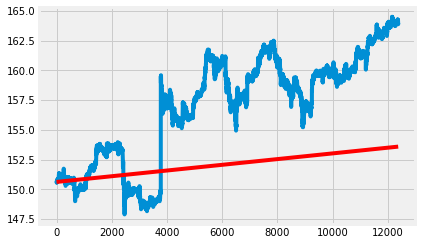

In [35]:
plt.plot(test)
plt.plot(predictions, color='red')

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.560907983077655